In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rh = pd.read_csv("data/rh/rh_aggregate_data.csv")
gme = pd.read_csv("data/gme/gme_aggregate_data.csv")

<AxesSubplot:xlabel='transaction_date', ylabel='rh_total_estimated_sales'>

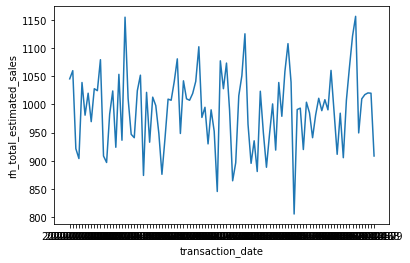

In [3]:
sns.lineplot(x="transaction_date", y="rh_total_estimated_sales", data=rh, ci=None)

In [4]:
rh["source"] = "rh-original"
gme["source"] = "newly-estimated"

In [5]:
rh

,transaction_date,state,rh_total_estimated_sales,source
0,2020-01-01,CA,1031,rh-original
1,2020-01-01,NY,1060,rh-original
2,2020-01-02,CA,995,rh-original
3,2020-01-02,NY,1125,rh-original
4,2020-01-03,CA,1046,rh-original
...,...,...,...,...
195,2020-04-07,NY,1038,rh-original
196,2020-04-08,CA,1053,rh-original
197,2020-04-08,NY,987,rh-original
198,2020-04-09,CA,864,rh-original


In [6]:
gme

,transaction_date,state,gme_total_estimated_sales,source
0,2020-01-01,CA,2251,newly-estimated
1,2020-01-01,NY,2290,newly-estimated
2,2020-01-02,CA,2171,newly-estimated
3,2020-01-02,NY,2449,newly-estimated
4,2020-01-03,CA,2292,newly-estimated
...,...,...,...,...
195,2020-04-07,NY,2276,newly-estimated
196,2020-04-08,CA,2301,newly-estimated
197,2020-04-08,NY,2155,newly-estimated
198,2020-04-09,CA,1938,newly-estimated


In [7]:
rh_just_ca = rh.where(rh.state == "CA").dropna().rename(columns={"rh_total_estimated_sales":"transaction_amounts"})
gme_just_ca = gme.where(gme.state == "CA").dropna().rename(columns={"gme_total_estimated_sales":"transaction_amounts"})
total = rh_just_ca.append(gme_just_ca).drop("state", axis=1)

In [8]:
total

,transaction_date,transaction_amounts,source
0,2020-01-01,1031.0,rh-original
2,2020-01-02,995.0,rh-original
4,2020-01-03,1046.0,rh-original
6,2020-01-04,963.0,rh-original
8,2020-01-05,1096.0,rh-original
...,...,...,...
190,2020-04-05,1973.0,newly-estimated
192,2020-04-06,2140.0,newly-estimated
194,2020-04-07,2233.0,newly-estimated
196,2020-04-08,2301.0,newly-estimated


<AxesSubplot:xlabel='transaction_date', ylabel='transaction_amounts'>

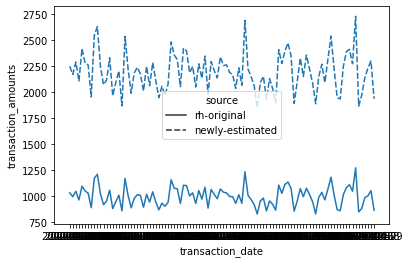

In [9]:
sns.lineplot(x="transaction_date", y="transaction_amounts", data=total, style="source", ci=None)